# Upper Confidence Bound (UCB)

## UCB Intuition

This algorithm is good for making a choice when there are multiple possibilities, and it is difficult initially to determine which possibility may be the best. It differs from A/B testing by combining the exploration and explotation steps by accounting for regret with each experiment within a cycle. If there are 500 experiments for options A-E, and the first run D goes poorly it will reduce the likely outcome range, and lower the upper bound of possibility. It may make suboptimal choices along the way until it's completely positive it knows the optimal choice. 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [9]:
dataset = pd.read_csv('C:\\Users\\JoeWi\\MachineLearningModels\\Data\\Ads_CTR_Optimisation.csv')

## Implementing UCB

I sat N to the number of rows present in the dataset. This means if you had a similar dataset with fewer or more rows it would not be a problem. Each row represents a choice that was made and recorded. 

I sat d to the number of columns present in the dataset. This means the script can handle more than or less than 10 ads/possible choices without any extra work.

In [10]:
import math

N = len(dataset)
d = len(dataset.columns)

ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] = numbers_of_selections[ad] + 1
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward
        total_reward = total_reward + reward

## Visualizing the results

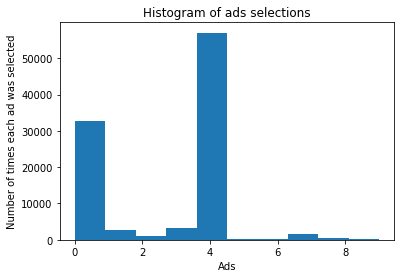

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()